# GENERATING PYTHAGOREAN TRIPLES

While reading the book [*Fermat's Last Theorem* by Simon Singh](https://en.wikipedia.org/wiki/Fermat%27s_Last_Theorem_(book)) I was confronted and fascinated about [Pythagorean triples](https://en.wikipedia.org/wiki/Pythagorean_triple). And sure it was definitely simple enough problem for me to implement something. But how to tackle this? After skimming through the Wikipedia article I found a very nice looking scatter plot that makes me curious. Plot shows the legs $(a, b)$ of all pythagorean triples under $4500$:

![Pythagorean triples Wikipedia](https://upload.wikimedia.org/wikipedia/commons/e/e2/Pythagorean_Triples_Scatter_Plot.png)

### What is a pythagorean triple?

> A Pythagorean triple consists of three positive integers $a$, $b$, and $c$, such that $a^2 + b^2 = c^2$.

For example $(3, 4, 5)$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

from itertools import combinations
from tqdm.notebook import tqdm
from math import sqrt

Define a function that takes a, b and c and returns either its a pythagorean triple or not

In [2]:
def is_triple(a, b, c):
    if a**2+b**2 == c**2:
        return True
    else:
        return False

In [3]:
is_triple(3, 4, 5)

True

### Naive approach

I have implemented a function that takes a `limit` and returns all pythagorean triples where $a < b < limit$.

In [4]:
def naive_search(limit):
    ptriples = []
    
    for a in range(1, limit):
        for b in range(a+1, limit):
            c2 = a**2+b**2
            c = sqrt(c2)
            if c2%c == 0:
                ptriples.append((a, b, int(c)))
                
    return ptriples


ptriples = naive_search(20)
ptriples

[(3, 4, 5), (5, 12, 13), (6, 8, 10), (8, 15, 17), (9, 12, 15), (12, 16, 20)]

To compute the results like in the wikipedia template, I've created a function that computes all legs combinations of a given triple. For example:

```
(3, 4, 5) pythagorean triple
(3, 4)   (-3, 4)
(4, 3)   (3, -4)
(-3, -4) (-4, 3)
(-4, -3) (4, -3)
```

We see there are 8 legs combinations for one triple.

In [5]:
def generate_legs(ptriples):
    legs = [(a, b) for a, b, c in ptriples]
    legs += [[b, a] for a, b in legs]
    legs_neg1 = [[-a, -b] for a, b in legs]
    legs_neg2 = [[-a, b] for a, b in legs]
    legs_neg3 = [[a, -b] for a, b in legs]
    legs += legs_neg1 + legs_neg2 + legs_neg3
    return legs


len(generate_legs(ptriples))

48

### Analyse performance

To generate triples there is also a very elegant solution thats based on the *Euclid's formula*. First I've started with this solution but had problems to combine it with the `limit` without affecting the computing time in a negative way. Furthermore the performance of the naive function is totally fine to compute the results that are shown in the wikipedia template plot. This is a bar plot that shows the computing times of the naive approach with different `limits`:

In [6]:
ns = range(500, 5001, 500)
durations = []

for n in tqdm(ns):
    start = time.time()
    ptriples = naive_search(n)
    end = time.time()
    durations.append(end-start)

<BarContainer object of 10 artists>

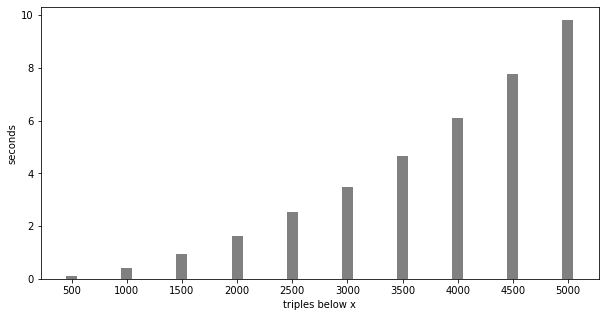

In [7]:
plt.figure(figsize=(10, 5))
plt.xlabel("triples below x")
plt.ylabel("seconds")
plt.bar(ns, durations, width=100, tick_label=ns, color="grey")

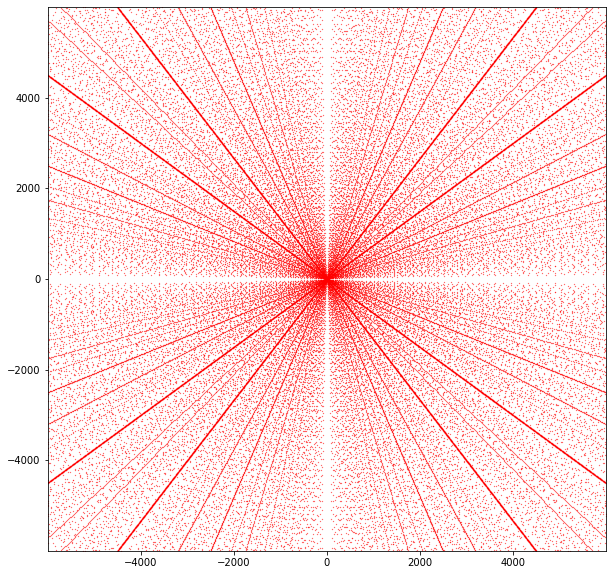

In [8]:
ptriples = naive_search(6000)
legs = generate_legs(ptriples)
xy_max = np.array(legs).max()

x = np.array(legs)[:,0]
y = np.array(legs)[:,1]

plt.figure(figsize=(10, 10))
plt.xlim([-xy_max, xy_max])
plt.ylim([-xy_max, xy_max])
plt.plot(x, y, "r.", ms=.5)